## About Dataset

The dataset was developed by starting with satellite images of the ocean, some of which contain an oil spill and some that do not. Images were split into sections and processed using computer vision algorithms to provide a vector of features to describe the contents of the image section or patch.<br><br>

The task is, given a vector that describes the contents of a patch of a satellite image, then predicts whether the patch contains an oil spill or not, e.g. from the illegal or accidental dumping of oil in the ocean.
There are two classes and the goal is to distinguish between spill and non-spill using the features for a given ocean patch.
<br><br>
Now , we will apply different Classification algorithms to classify whether the oil is spilled or not.

## Importing the Libraries

In [1]:
import numpy as ny                # for mathematical computation
import pandas as pd               # for data cleaning and preprocessing
import matplotlib.pyplot as plt   # for visualization
import seaborn as sns             # for visualization

import warnings
warnings.filterwarnings('ignore')

## Let's read the Dataset

In [2]:
df = pd.read_csv('oil_spill.csv')
df.head()

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,target
0,1,2558,1506.09,456.63,90,6395000,40.88,7.89,29780.0,0.19,...,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95,1
1,2,22325,79.11,841.03,180,55812500,51.11,1.21,61900.0,0.02,...,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
2,3,115,1449.85,608.43,88,287500,40.42,7.34,3340.0,0.18,...,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
3,4,1201,1562.53,295.65,66,3002500,42.40,7.97,18030.0,0.19,...,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
4,5,312,950.27,440.86,37,780000,41.43,7.03,3350.0,0.17,...,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0


### Checking the Shape of the DataFrame

In [3]:
df.shape

(937, 50)

### Checking for Data Types

In [4]:
df.dtypes.value_counts()

float64    39
int64      11
dtype: int64

### 1) Handling Null Values

In [5]:
nv = df.isna().sum()
nv[nv>0]

Series([], dtype: int64)

### 2) Handling Duplicates

In [6]:
df.duplicated().sum()

0

### Inference :-
There are no null values and no duplicates to be handeled.

## Checking the Target Variable

In [7]:
df['target'].value_counts()

0    896
1     41
Name: target, dtype: int64

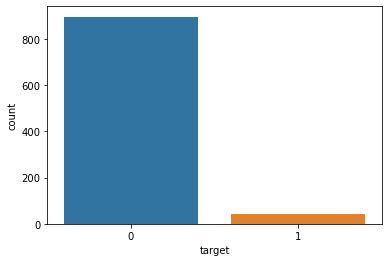

In [8]:
sns.countplot(x=df['target'])
plt.show()

### Inference :-
There are very few times that the oil got spilled.

# ML Model Building

### Selecting Dependent and Independent Features

In [9]:
x = df.drop('target', axis=1)
y = df['target']

print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(937, 49)
(937,)


### Standardizing the Data

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
sc = StandardScaler()
x_sc = sc.fit_transform(x)

print(x_sc.shape)
print(type(x_sc))

(937, 49)
<class 'numpy.ndarray'>


### Splitting the Data into Train and Test Data

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=38)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(702, 49)
(235, 49)
(702,)
(235,)


### Creating Functions to Evaluate the confusion Matrix, Classification Report and to Generate Training and Testing Score

In [14]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [15]:
def eval_model(ytest, ypred) :
  cm = confusion_matrix(ytest, ypred)
  print(cm)
  print('Accuracy Score\n\n', accuracy_score(ytest, ypred))
  print(classification_report(ytest, ypred))


def mscore(model):
    print('Training Score',model.score(x_train,y_train))  # Training Accuracy
    print('Testing Score',model.score(x_test,y_test))     # Testing Accuracy

## Importing the ML Libraries

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

### 1) Logistic Reression

In [17]:
lr = LogisticRegression(max_iter = 10000, solver = 'liblinear')
lr.fit(x_train, y_train)
mscore(lr)

Training Score 0.9743589743589743
Testing Score 0.9659574468085106


In [18]:
ypred_lr = lr.predict(x_test)
eval_model(y_test, ypred_lr)

[[219   4]
 [  4   8]]
Accuracy Score

 0.9659574468085106
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       223
           1       0.67      0.67      0.67        12

    accuracy                           0.97       235
   macro avg       0.82      0.82      0.82       235
weighted avg       0.97      0.97      0.97       235



### 2) KNeighbors Classifier

Accuracy
 [0.948936170212766, 0.948936170212766, 0.9446808510638298, 0.948936170212766, 0.948936170212766, 0.948936170212766, 0.948936170212766, 0.948936170212766, 0.948936170212766, 0.948936170212766, 0.948936170212766, 0.948936170212766, 0.948936170212766, 0.948936170212766, 0.948936170212766, 0.948936170212766, 0.948936170212766, 0.948936170212766, 0.948936170212766] 




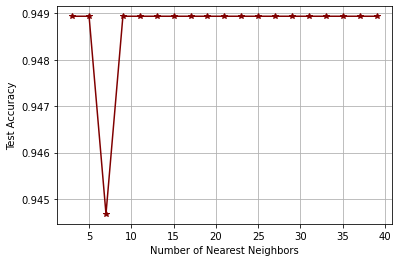

In [19]:
def optimal_K() :
    k = list(range(3, 40, 2))       # k= 3,5,7,9....,35,37,39
    acc = []
    for i in range(len(k)) :
        knn_model = KNeighborsClassifier(n_neighbors = k[i])
        knn_model.fit(x_train, y_train)
        acc.append(knn_model.score(x_test, y_test))
    print('Accuracy\n', acc,'\n\n')
    plt.plot(k, acc, color = 'maroon', marker = '*')
    plt.xlabel('Number of Nearest Neighbors')
    plt.ylabel('Test Accuracy')
    plt.grid()
    plt.show()
    
    
optimal_K()

In [20]:
# Optimal value of K = 9

knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(x_train, y_train)
mscore(knn)

Training Score 0.9586894586894587
Testing Score 0.948936170212766


In [21]:
ypred_knn = knn.predict(x_test)
eval_model(y_test, ypred_knn)

[[223   0]
 [ 12   0]]
Accuracy Score

 0.948936170212766
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       223
           1       0.00      0.00      0.00        12

    accuracy                           0.95       235
   macro avg       0.47      0.50      0.49       235
weighted avg       0.90      0.95      0.92       235



### 3) DecisoinTree Classifier

In [22]:
dt = DecisionTreeClassifier(criterion='gini', max_depth=6, min_samples_split = 9)
dt.fit(x_train, y_train)
mscore(dt)

Training Score 0.99002849002849
Testing Score 0.9617021276595744


In [23]:
ypred_dt = dt.predict(x_test)
eval_model(y_test, ypred_dt)

[[221   2]
 [  7   5]]
Accuracy Score

 0.9617021276595744
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       223
           1       0.71      0.42      0.53        12

    accuracy                           0.96       235
   macro avg       0.84      0.70      0.75       235
weighted avg       0.96      0.96      0.96       235



### 4) RandomForest Classifier

In [24]:
rf = RandomForestClassifier(criterion='gini', max_depth=6, min_samples_split = 9)
rf.fit(x_train, y_train)
mscore(rf)

Training Score 0.9786324786324786
Testing Score 0.9531914893617022


In [25]:
ypred_rf = rf.predict(x_test)
eval_model(y_test, ypred_rf)

[[223   0]
 [ 11   1]]
Accuracy Score

 0.9531914893617022
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       223
           1       1.00      0.08      0.15        12

    accuracy                           0.95       235
   macro avg       0.98      0.54      0.56       235
weighted avg       0.96      0.95      0.93       235



### 5) Bagging Classifier

In [26]:
# Bagging Classifier with Decsion Tree

bc_dt = BaggingClassifier(base_estimator=dt, n_estimators=15, max_features=x_train.shape[1], max_samples=x_train.shape[0])
bc_dt.fit(x_train, y_train)
mscore(bc_dt)

Training Score 0.9829059829059829
Testing Score 0.9702127659574468


In [27]:
ypred_bc_dt = bc_dt.predict(x_test)
eval_model(y_test, ypred_bc_dt)

[[223   0]
 [  7   5]]
Accuracy Score

 0.9702127659574468
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       223
           1       1.00      0.42      0.59        12

    accuracy                           0.97       235
   macro avg       0.98      0.71      0.79       235
weighted avg       0.97      0.97      0.96       235



In [28]:
# Bagging Classifier with Random Forest

bc_rf = BaggingClassifier(base_estimator=rf, n_estimators=15, max_features=x_train.shape[1], max_samples=x_train.shape[0])
bc_rf.fit(x_train, y_train)
mscore(bc_rf)

Training Score 0.9672364672364673
Testing Score 0.9531914893617022


In [29]:
ypred_bc_rf = bc_rf.predict(x_test)
eval_model(y_test, ypred_bc_rf)

[[223   0]
 [ 11   1]]
Accuracy Score

 0.9531914893617022
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       223
           1       1.00      0.08      0.15        12

    accuracy                           0.95       235
   macro avg       0.98      0.54      0.56       235
weighted avg       0.96      0.95      0.93       235



## Comparing Performance of Different Models

In [30]:
performance = {'Logistic Regression' : accuracy_score(y_test, ypred_lr),
               'KNN Classifier' : accuracy_score(y_test, ypred_knn),
               'Decision Tree' : accuracy_score(y_test, ypred_dt),
               'Random Forest' : accuracy_score(y_test, ypred_rf),
              'Bagging with DT' : accuracy_score(y_test, ypred_bc_dt),
              'Bagging with RF' : accuracy_score(y_test, ypred_bc_rf),}

res = pd.DataFrame(performance, index = ['Accuracy'])
res.T

,Accuracy
Logistic Regression,0.965957
KNN Classifier,0.948936
Decision Tree,0.961702
Random Forest,0.953191
Bagging with DT,0.970213
Bagging with RF,0.953191


### Inference :-
The best model is the Bagging Classifier where the base estimator is DecisionTree Model with the accuracy score of 97%.

## Saving the Model

In [31]:
import pickle

In [32]:
pickle.dump(bc_dt, open('bc_dt.pkl', 'wb'))

## Load the Model

In [33]:
best = pickle.load(open('bc_dt.pkl', 'rb'))

### Making a new random dataset

In [42]:
new_df = df.sample(20)
print(new_df.shape)
new_df.head()

(20, 50)


,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,target
742,10,27,12.48,531.37,62,218700,49.33,7.01,2419.0,0.14,...,1127.70,127.28,92.57,59.45,12.18,1,3620.58,66.04,5.97,0
730,83,11,44.82,576.64,60,89100,74.18,13.04,868.0,0.18,...,324.50,254.56,127.28,127.28,2.55,0,3308.85,66.11,6.02,0
5,6,54,1438.13,544.91,82,135000,44.67,6.92,1570.0,0.15,...,608.28,200.00,150.00,52.22,4.06,0,30967.25,65.77,7.85,1
138,128,136,1607.52,1626.35,17,340000,35.07,8.56,3510.0,0.24,...,1044.03,538.52,290.91,134.73,3.59,0,4011.67,66.35,7.75,0
602,34,18,16.00,384.28,125,145800,53.22,9.37,1535.0,0.18,...,649.00,127.28,106.07,51.96,6.12,1,8654.28,65.85,6.13,0


In [43]:
# Selecting the Dependent Featurtes and Generating the Predictions

new_x = new_df.drop('target', axis=1)
print(new_x.shape)

best_pred = best.predict(new_x)
best_pred

(20, 49)


array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [44]:
res = pd.DataFrame({'Serial No.' : new_df.index,
             'Target' : best_pred})
res

,Serial No.,Target
0,742,0
1,730,0
2,5,1
3,138,0
4,602,0
5,20,0
6,238,0
7,457,0
8,135,0
9,774,0
